In [1]:
import sys

import tensorflow.keras
import pandas as pd

import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")

gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.4.0
Keras Version: 2.4.0

Python 3.8.8 | packaged by conda-forge | (default, Feb 20 2021, 15:50:08) [MSC v.1916 64 bit (AMD64)]
Pandas 1.2.3
GPU is available


In [2]:
import sys
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Conv2DTranspose
from tensorflow.keras.layers import Dense, Dropout,Flatten, Reshape, Activation
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization, Input, LeakyReLU, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow.compat.v1 as tf
from tqdm import tqdm

In [3]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.log_device_placement = True
sess = tf.Session(config=config)

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Quadro M620, pci bus id: 0000:01:00.0, compute capability: 5.0



In [4]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi('{"username":"kevalbotadra","key":"e5a5e4bf79e438e2b2b8e3a8a87d1c59"}')
api.authenticate()

In [5]:
api.dataset_download_files("soumikrakshit/anime-faces")

In [6]:
from zipfile import ZipFile
zip = ZipFile('anime-faces.zip')
zip.extractall()

In [7]:
image_cols = 64
image_rows = 64
image_channels = 3
image_shape = (image_cols, image_rows, image_channels)

In [8]:
class DataPreprocesser():
    def __init__(self):
        self.face_data = "data"
        print("Preprocessing Data Now:")
    def create_data(self, face_data=None):
        if self.face_data == None:
            face_data = self.face_data
            
        anime_faces = []
        
        for face in tqdm(os.listdir(face_data)):
            anime_face = cv2.imread(os.path.join(face_data,face))
            if anime_face is not None:
                anime_face = cv2.resize(anime_face, (image_cols, image_rows))
                anime_face = cv2.cvtColor(anime_face, cv2.COLOR_BGR2RGB)
                anime_faces.append(anime_face)
        anime_faces = np.array(anime_faces)
        return anime_faces

    def normalize_data(self, face_data="data"):
        X_train = self.create_data(face_data)
        X_train = X_train / 256
        return X_train

In [9]:
data_preprocess = DataPreprocesser()
images = data_preprocess.normalize_data()

  0%|                                                                              | 11/21552 [00:00<03:17, 109.20it/s]

Preprocessing Data Now:


100%|███████████████████████████████████████████████████████████████████████████| 21552/21552 [01:51<00:00, 193.04it/s]


In [10]:
from PIL import Image
from matplotlib.pyplot import imshow
def show_images(r):
    r = r * 256
    fig,ax = plt.subplots(3,3, figsize = (8,8)) 
    for i in range(3):
        for j in range(3):
            idx = 4 * i + j
            ax[i,j].imshow(r[idx])
            ax[i,j].axis('off')
    # fig.save(f"images/{epoch}.png")

In [11]:
print(images.shape)

(21551, 64, 64, 3)


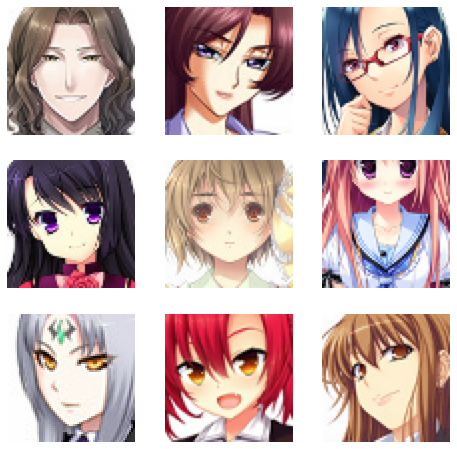

In [12]:
import random
rand_images = random.sample(list(images), 1000)
show_images(rand_images)

In [15]:
class Anime_GAN():
    def __init__(self):
        self.batch_size = 100
        self.latent_dims = 100
        self.image_cols = 64
        self.image_rows = 64
        self.image_channels = 3
        self.image_shape = (image_cols, image_rows, image_channels)
        
        self.discriminator = self.build_dis()
        my_accuracy = keras.metrics.Accuracy()
        self.discriminator.compile(loss="binary_crossentropy", optimizer="adam", metrics=[my_accuracy])
        
        self.generator = self.build_gen()
        generator = self.generator
        img_inp = Input(shape=(self.latent_dims))
        gen_img = self.generator(img_inp)
        
        self.discriminator.trainable = False
        validity = self.discriminator(gen_img)
        
        
        
        self.combined = Model(img_inp, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer="adam")
    
    def get_noise(batch_size=None, noise_dim=None):
        
        if noise is None:
            noise_dim = self.noise_dim
        
        if batch_size is None:
            batch_size = self.batchsize
        
    
    def build_gen(self, latent_dims=None, image_shape=image_shape):
        if latent_dims == None:
            latent_dims = self.latent_dims
            
            model = Sequential()
            model.add(layers.Dense(64*4*4, use_bias=False, input_shape=(100,)))
            model.add(layers.BatchNormalization())
            model.add(layers.LeakyReLU())
            model.add(layers.Reshape((4, 4, 64)))

            model.add(layers.Conv2DTranspose(128, (3, 3), strides=(1, 1), padding='same', use_bias=False))
            model.add(layers.BatchNormalization())
            model.add(layers.LeakyReLU())
            model.add(layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', use_bias=False))
            
#             model.add(layers.BatchNormalization())
#             model.add(layers.LeakyReLU())
#             model.add(layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', use_bias=False))

            model.add(layers.BatchNormalization())
            model.add(layers.LeakyReLU())
            model.add(layers.Conv2DTranspose(3, (3, 3), strides=(8, 8), padding='same', use_bias=False, activation='tanh'))
            
#         epsilon = 0.00001 # Small float added to variance to avoid dividing by zero in the BatchNorm layers.
        
#         model = Sequential()
            
#         model.add(Dense(64*4*4, input_dim=latent_dims, use_bias=False))
#         model.add(BatchNormalization())
#         model.add(Reshape((4, 4, 64)))

#         model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
#         model.add(BatchNormalization(epsilon=epsilon))
#         model.add(LeakyReLU(alpha=0.2))
#         model.add(UpSampling2D())

#         model.add(Conv2D(filters=65, kernel_size=(4, 4), padding="same", kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
#         model.add(BatchNormalization(epsilon=epsilon))
#         model.add(LeakyReLU(alpha=0.2))
#         model.add(UpSampling2D())

#         model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
#         model.add(BatchNormalization(epsilon=epsilon))
#         model.add(LeakyReLU(alpha=0.2))
#         model.add(UpSampling2D())

#         model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
#         model.add(BatchNormalization(epsilon=epsilon))
#         model.add(LeakyReLU(alpha=0.2))
#         model.add(UpSampling2D())
        
#         model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
#         model.add(BatchNormalization(epsilon=epsilon))
#         model.add(LeakyReLU(alpha=0.2))
#         model.add(UpSampling2D())

        
        
#         model.add(Conv2D(filters=3, kernel_size=(1, 1), strides=(2, 2), padding="same", kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
    
        
#         model.add(Activation("tanh"))

    

        model.summary()

        noise = Input(shape=(self.latent_dims,))
        img = model(noise)

        return Model(noise, img)

    def build_dis(self):
    
        model = Sequential()

        model.add(Input(shape=(64, 64, 3)))
        model.add(BatchNormalization())
        model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
        model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(2,2))
        model.add(Dropout(0.25))

        model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same"))
        model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same"))
        model.add(LeakyReLU(alpha=0.2))
#         model.add(BatchNormalization())
#         model.add(MaxPooling2D(2,2))
#         model.add(Dropout(0.25))

#         model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same"))
#         model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same"))
#         model.add(LeakyReLU(alpha=0.2))
#         model.add(BatchNormalization())
#         model.add(MaxPooling2D(2, 2))
#         model.add(Dropout(0.25))

#         model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same"))
#         model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same"))
#         model.add(LeakyReLU(alpha=0.2))
#         model.add(BatchNormalization())
#         model.add(MaxPooling2D(2,2))
#         model.add(Dropout(0.25))


        model.add(Flatten())

        model.add(Dense(128))
#         model.add(Dropout(0.3))
#         model.add(BatchNormalization())

#         model.add(Dense(64))
#         model.add(Dropout(0.2))
#         model.add(BatchNormalization())

#         model.add(Dense(64))
#         model.add(Dropout(0.2))

#         model.add(Dense(32))
#         model.add(Dropout(0.2))

        model.add(Dense(1, activation="sigmoid"))
        model.summary()

        image = Input(shape=self.image_shape)
        clf = model(image)

        return Model(image, clf)
    
    def save_images(self, epoch, latent_dims=None):
        if latent_dims == None:
            latent_dims = self.latent_dims
            
        fig_num = 9
        noise = np.random.normal(0, 1, (fig_num, latent_dims))
        gen_images = self.generator.predict(noise)
        gen_images = gen_images*256
        idx = 0
        fig,ax = plt.subplots(3,3, figsize = (8,8)) 
        for i in range(3):
            for j in range(3):
                ax[i,j].imshow(gen_images[idx,:,:,0])
                ax[i,j].axis('off')
                idx += 1
                
        plt.show()
        fig.savefig(f"images/epoch-{epoch}.png")
        self.generator.save(f"models/generator-{epoch}.h5")
    
    def train(self, epochs=2000, latent_dims=None, batch_size=None, save_interval=75, metric_update=50):
        if latent_dims == None:
            latent_dims = self.latent_dims
        
        if batch_size == None:
            batch_size = self.batch_size
    
        
        data_preprocess = DataPreprocesser()
        X_train = data_preprocess.normalize_data()
        
        real = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        
        for epoch in range(epochs):
            img_idx = np.random.randint(0, X_train.shape[0], batch_size)
            real_imgs = []
            for i in img_idx:
                real_img = X_train[i]
                real_imgs.append(real_img)
            
            real_imgs = np.array(real_imgs)
            
            gen_noise = np.random.normal(0, 1, (batch_size, latent_dims))
            fake_imgs = self.generator.predict(gen_noise)
            
            loss_real = self.discriminator.train_on_batch(real_imgs, real)
            loss_fake = self.discriminator.train_on_batch(fake_imgs, fake)
            
            disc_loss, disc_acc = 0.5 * np.add(loss_real, loss_fake)
            
            
            gen_noise = np.random.normal(0, 1, (batch_size, latent_dims))
            gen_loss = self.combined.train_on_batch(gen_noise, real)
            
   
            
            if epoch % metric_update == 0:
                print(f"{epoch}: Discriminator Loss-{disc_loss}, Accuracy-{disc_acc*100}, Generator Loss-{gen_loss}")
    
            if epoch % save_interval == 0:
                self.save_images(epoch)
                
                
                

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_5 (Batch (None, 64, 64, 3)         12        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)       

  1%|▊                                                                           | 235/21552 [00:00<00:09, 2332.81it/s]

Preprocessing Data Now:


100%|██████████████████████████████████████████████████████████████████████████| 21552/21552 [00:08<00:00, 2592.12it/s]


0: Discriminator Loss-398.1804754137993, Accuracy-0.0, Generator Loss-4.525152206420898


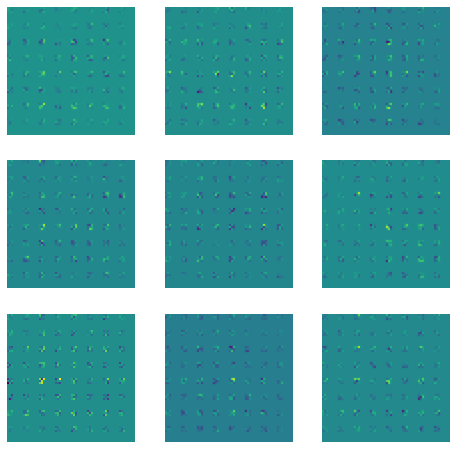

50: Discriminator Loss-0.0, Accuracy-100.0, Generator Loss-0.0
100: Discriminator Loss-0.0, Accuracy-100.0, Generator Loss-1.2168588031662738e-33


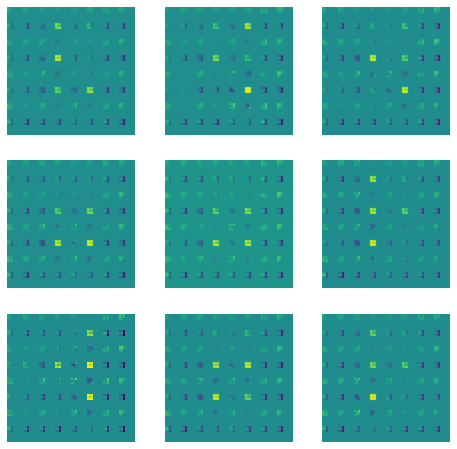

150: Discriminator Loss-0.0, Accuracy-100.0, Generator Loss-1.649370918271536e-30


KeyboardInterrupt: 

In [16]:
anime_gan = Anime_GAN()
anime_gan.train(epochs=50000, save_interval=100)